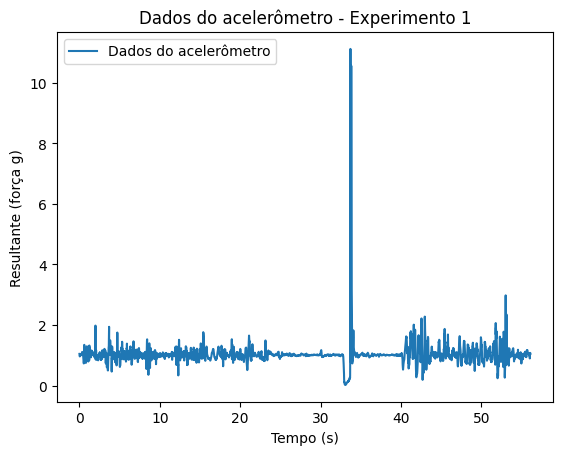

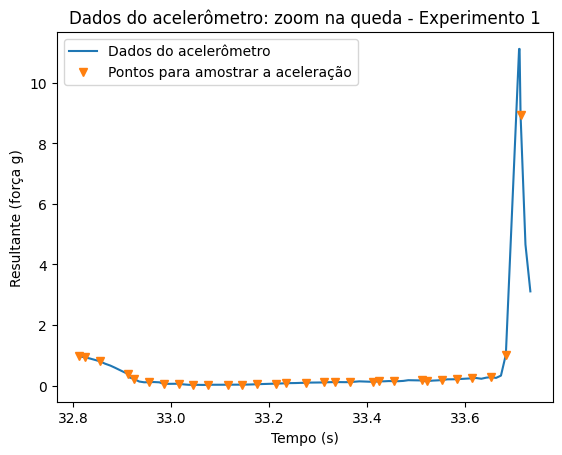

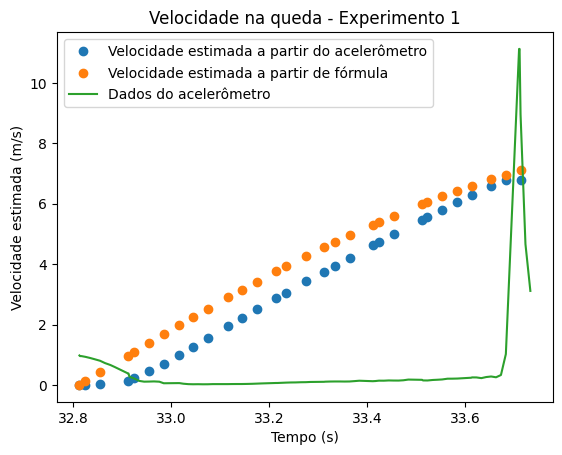

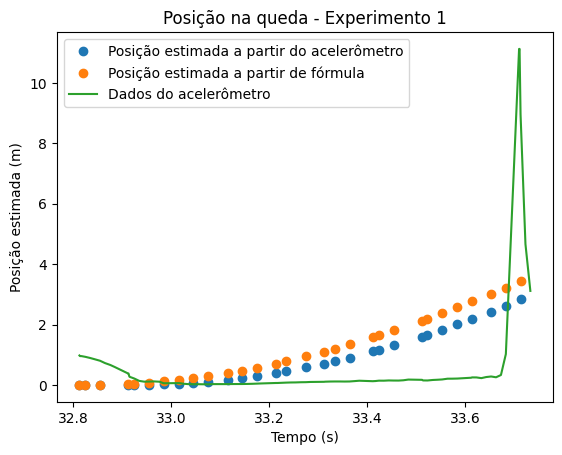


---------------------------------------------------------------------
Sumário de dados do experimento 1

Velocidade média do objeto (m/s): 3.14
Distância percorrida pelo objeto (m): 2.83
---------------------------------------------------------------------



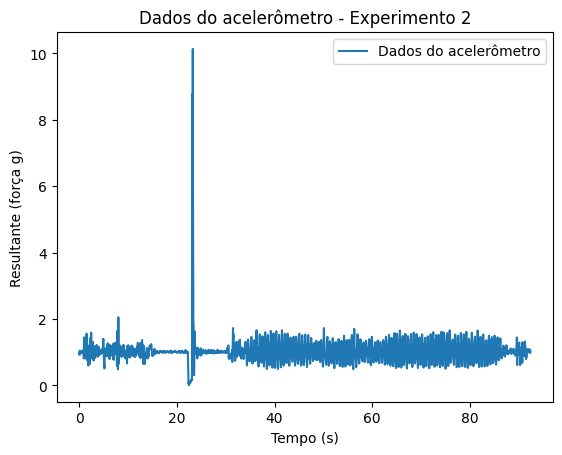

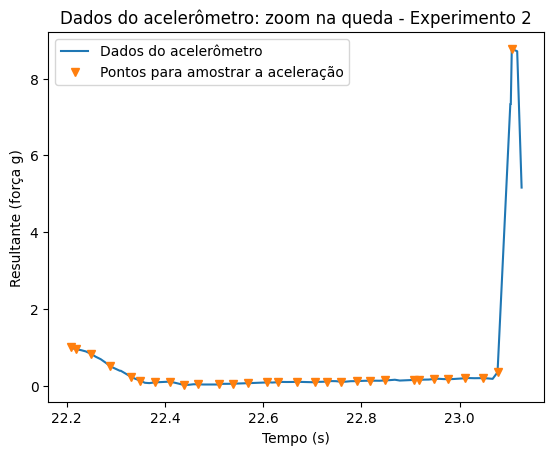

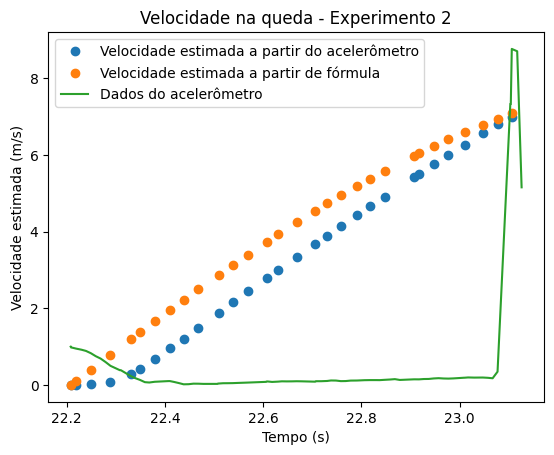

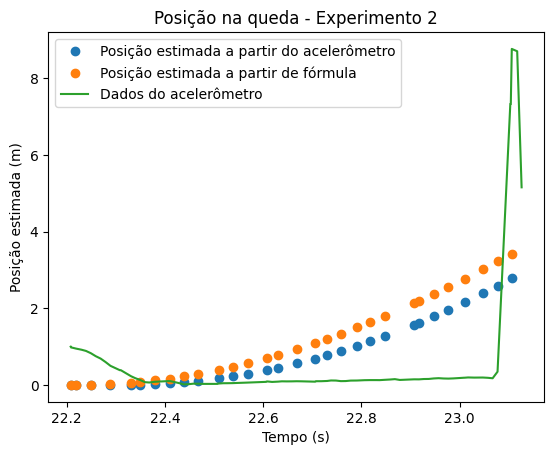


---------------------------------------------------------------------
Sumário de dados do experimento 2

Velocidade média do objeto (m/s): 3.11
Distância percorrida pelo objeto (m): 2.79
---------------------------------------------------------------------



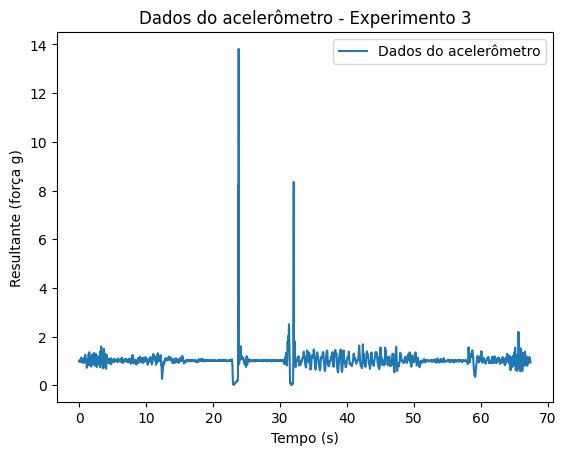

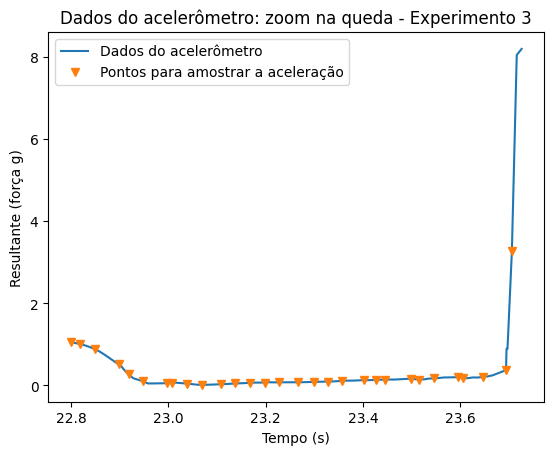

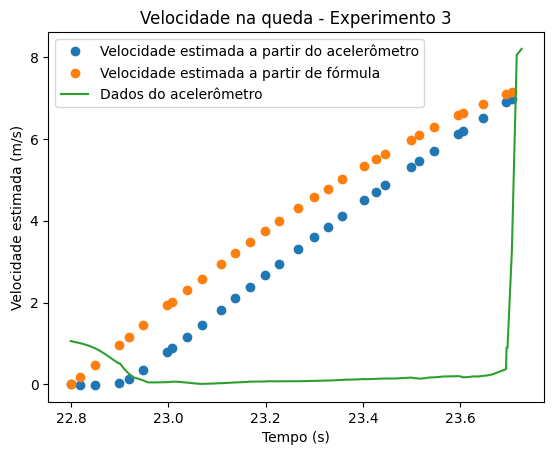

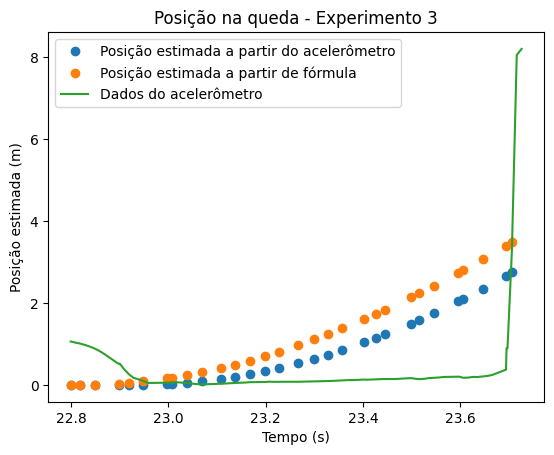


---------------------------------------------------------------------
Sumário de dados do experimento 3

Velocidade média do objeto (m/s): 3.02
Distância percorrida pelo objeto (m): 2.74
---------------------------------------------------------------------



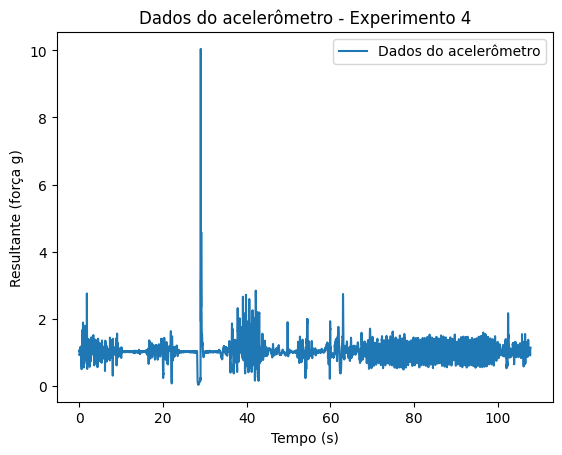

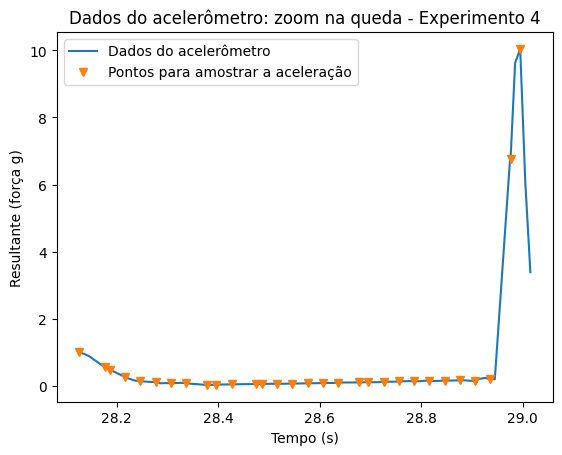

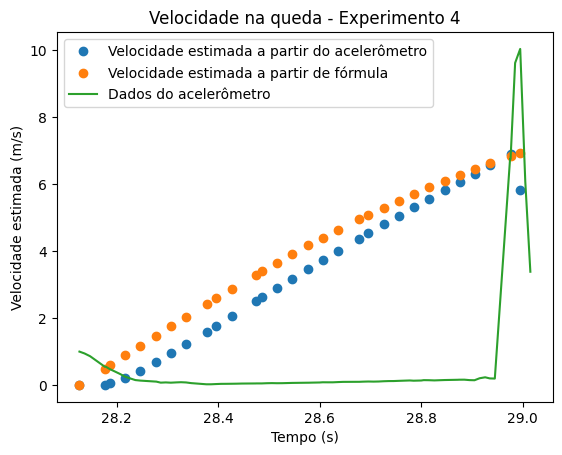

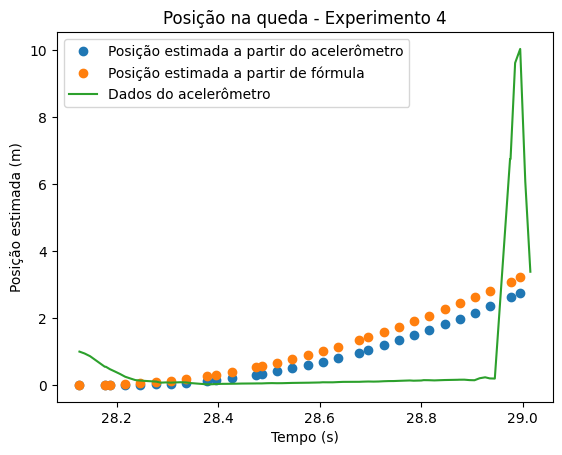


---------------------------------------------------------------------
Sumário de dados do experimento 4

Velocidade média do objeto (m/s): 3.17
Distância percorrida pelo objeto (m): 2.75
---------------------------------------------------------------------



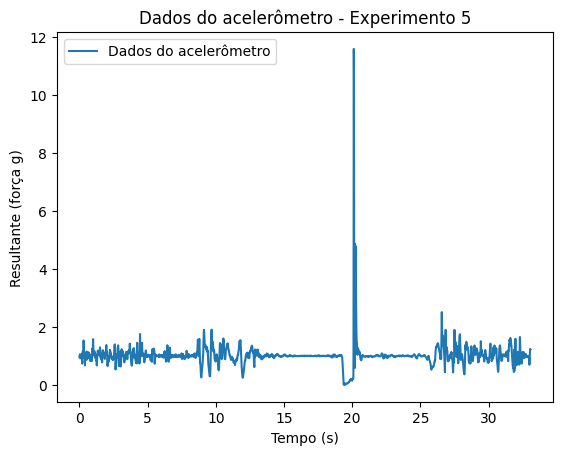

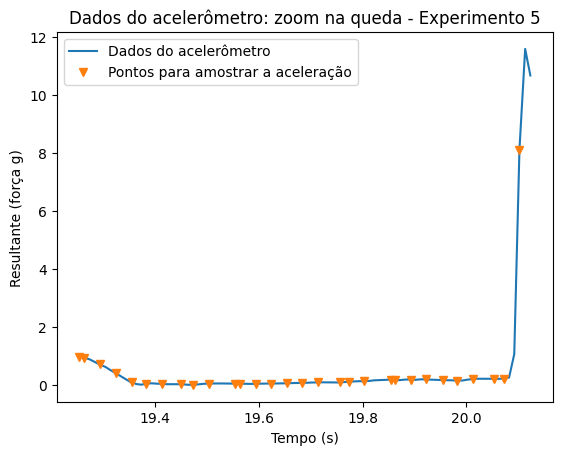

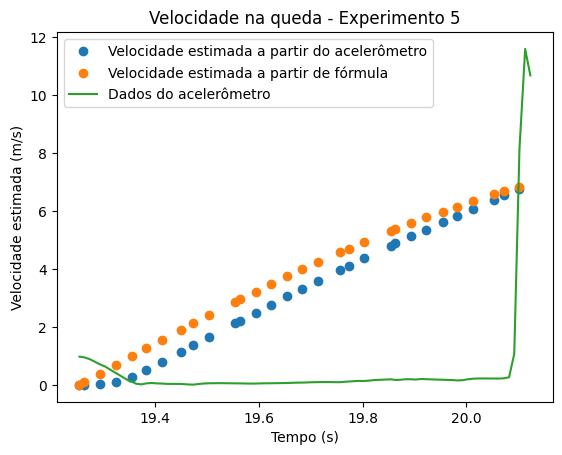

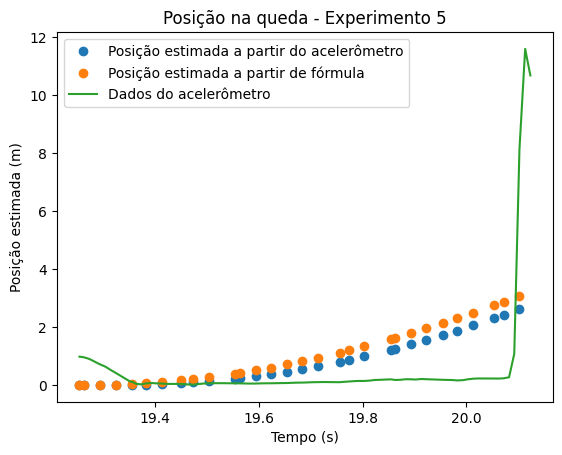


---------------------------------------------------------------------
Sumário de dados do experimento 5

Velocidade média do objeto (m/s): 3.09
Distância percorrida pelo objeto (m): 2.62
---------------------------------------------------------------------



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# imprime uma string s + um número f com duas casas de precisão
def myPrintFloat(s, f):
  print(s, "{:.2f}".format(f))

# inicializa o vetor de estados
def initstateVector(x0, v0, t0):
  return np.array([x0, v0, t0]);

# função que extrai os dados obtidos somente de uma variável
def extractSVTrajectory(svt, i):
    aux = np.array(svt)
    return(aux[:, i])

# função rates que está calculando os valores assumindo que a aceleração causada pela
# resistência do ar é o valor mostrado pelo acelerômetro
def rates_acelerometro(s, dt, a):
  r0 = s[1] * dt
  r1 = (1 - a) * (9.8) * dt
  r2 = dt
  return(np.array([r0, r1, r2]))

# função que atualiza o vetor de estados assumindo que a aceleração causada pela
# resistência do ar é o valor mostrado pelo acelerômetro
def updateStateVector_acelerometro(s, dt, a):
  return s + rates_acelerometro(s, dt, a)

# função rates que está calculando os valores assumindo que a aceleração causada pela
# resistência do ar é calculada a partir de uma fórmula
def rates_formula(s, dt):
  r0 = s[1] * dt
  r1 = (9.8 - s[1] * s[1] * 0.2 / 2) * dt
  r2 = dt
  return(np.array([r0, r1, r2]))

# função que atualiza o vetor de estados assumindo que a aceleração causada pela
# resistência do ar é calculada a partir de uma fórmula
def updateStateVector_formula(s, dt):
  return s + rates_formula(s, dt)

# gera os gráficos para um arquivo específico 
def graficos(nome_arquivo, i, t0_queda, tf_queda):
  
  # lê os dados obtidos
  dados_acelerometro = np.array(pd.read_csv(nome_arquivo, sep = ";"))

  # ------- gráfico com os dados obtidos de todo o experimento -------

  tempo = dados_acelerometro[:, 0]
  aceleracao = dados_acelerometro[:, 4]

  fig, ax = plt.subplots()
  plt.plot(tempo, aceleracao, label = "Dados do acelerômetro")
  plt.title(f"Dados do acelerômetro - Experimento {i + 1}")
  ax.set_xlabel("Tempo (s)")
  ax.set_ylabel("Resultante (força g)")
  ax = plt.gca()
  ax.legend()
  plt.show()
  print()

  # ------- gráfico com somente os dados da queda -------

  tempo = dados_acelerometro[t0_queda:tf_queda, 0]
  aceleracao = dados_acelerometro[t0_queda:tf_queda, 4]

  # Pegar amostras da aceleração em alguns pontos para usar no método de euler
  numDeAmostras = 30
  espacoEntreAmostras = (tf_queda - t0_queda) / numDeAmostras

  # pegar o indice das amostras
  indAmostras = [round(ii * espacoEntreAmostras) for ii in range(numDeAmostras)]

  fig, ax = plt.subplots()
  plt.plot(tempo, aceleracao, label = "Dados do acelerômetro")
  plt.plot([tempo[ii] for ii in indAmostras], [aceleracao[ii] for ii in indAmostras], "v", label = "Pontos para amostrar a aceleração")
  plt.title(f"Dados do acelerômetro: zoom na queda - Experimento {i + 1}")
  ax.set_xlabel("Tempo (s)")
  ax.set_ylabel("Resultante (força g)")
  ax.legend()
  plt.show()
  print()

  # ------- obter dados da queda -------

  # Aproximar a função da velocidade com Euler
  stateVectorTraj_acelerometro = []
  stateVectorTraj_formula = []
  dts = np.diff(tempo[indAmostras])

  stateVector_acelerometro = initstateVector(0, 0, tempo[0]);
  stateVector_formula = initstateVector(0, 0, tempo[0]);
  stateVectorTraj_acelerometro.append(list(stateVector_acelerometro))
  stateVectorTraj_formula.append(list(stateVector_formula))

  # calcula as velocidades e posições (das duas maneiras) pelo método de euler
  for ii in range(len(dts)):
    stateVector_acelerometro = updateStateVector_acelerometro(stateVector_acelerometro, dts[ii], aceleracao[indAmostras[ii]])
    stateVector_formula = updateStateVector_formula(stateVector_formula, dts[ii])
    stateVectorTraj_acelerometro.append(list(stateVector_acelerometro))
    stateVectorTraj_formula.append(list(stateVector_formula))

  tempoVector = extractSVTrajectory(stateVectorTraj_acelerometro, 2)

  posiVector_acelerometro = extractSVTrajectory(stateVectorTraj_acelerometro, 0)
  velVector_acelerometro = extractSVTrajectory(stateVectorTraj_acelerometro, 1)

  posiVector_formula = extractSVTrajectory(stateVectorTraj_formula, 0)
  velVector_formula = extractSVTrajectory(stateVectorTraj_formula, 1)

  # Calculo da velocidade média
  distQueda = posiVector_acelerometro[-1] - posiVector_acelerometro[0]
  tempoQueda = tempoVector[-1] - tempoVector[0]
  velocidadeMedia = distQueda / tempoQueda

  # gera o gráfico da velocidade estimada pelo método de euler
  fig, ax = plt.subplots()
  plt.plot(tempoVector, velVector_acelerometro, "o", label = "Velocidade estimada a partir do acelerômetro")
  plt.plot(tempoVector, velVector_formula, "o", label = "Velocidade estimada a partir de fórmula")
  plt.plot(tempo, aceleracao, label = "Dados do acelerômetro")
  plt.title(f"Velocidade na queda - Experimento {i + 1}")
  ax.set_xlabel("Tempo (s)")
  ax.set_ylabel("Velocidade estimada (m/s)")
  ax.legend()
  plt.show()
  print()
  
  # gera o gráfico da posição estimada pelo método de euler
  fig, ax = plt.subplots()
  plt.plot(tempoVector, posiVector_acelerometro, "o", label = "Posição estimada a partir do acelerômetro")
  plt.plot(tempoVector, posiVector_formula, "o", label = "Posição estimada a partir de fórmula")
  plt.plot(tempo, aceleracao, label = "Dados do acelerômetro")
  plt.title(f"Posição na queda - Experimento {i + 1}")
  ax.set_xlabel("Tempo (s)")
  ax.set_ylabel("Posição estimada (m)")
  ax.legend()
  plt.show()
  print()

  # ------- dados gerais obtidos ------

  print("---------------------------------------------------------------------")
  print(f"Sumário de dados do experimento {i + 1}\n")

  myPrintFloat("Velocidade média do objeto (m/s):", velocidadeMedia)
  myPrintFloat("Distância percorrida pelo objeto (m):", distQueda)
  print("---------------------------------------------------------------------\n")

def main():
  t0_queda = [3290, 2225, 2285, 2820, 1930]
  tf_queda = [3385, 2320, 2380, 2910, 2020]

  for i in range(5):
    graficos(f"dados_queda{i + 1}.csv", i, t0_queda[i], tf_queda[i])

main()